In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# load the data
df = pd.read_csv('/home/sunbeam/Documents/ML/ml-o-02-data/ML-02-master/day08/real_estate_price_size.csv')
# print(df)
# print(df.isna().sum())
# print(np.corrcoef(df['price'], df['size']))

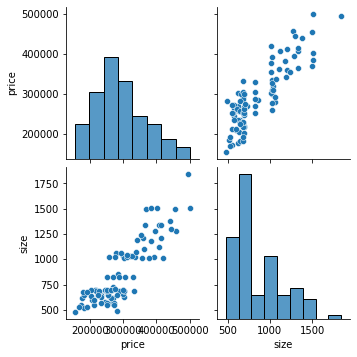

In [19]:
import seaborn as sns
sns.pairplot(df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
price    100 non-null float64
size     100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [21]:
df.describe()

price         size
count     100.000000   100.000000
mean   292289.470160   853.024200
std     77051.727525   297.941951
min    154282.128000   479.750000
25%    234280.148000   643.330000
50%    280590.716000   696.405000
75%    335723.696000  1029.322500
max    500681.128000  1842.510000

In [22]:
np.corrcoef(df['price'], df['size'])

array([[1.        , 0.86298273],
       [0.86298273, 1.        ]])

In [23]:
x = df.drop('price', axis = 1)

print(x)

y = df['price']

       size
0    643.09
1    656.22
2    487.29
3   1504.75
4   1275.46
..      ...
95   549.80
96  1037.44
97  1504.75
98   648.29
99   705.29

[100 rows x 1 columns]


In [24]:
print(np.corrcoef(df['size'],y))
print(np.cov(df['size'],y))

[[1.         0.86298273]
 [0.86298273 1.        ]]
[[8.87694060e+04 1.98114444e+07]
 [1.98114444e+07 5.93696871e+09]]


/home/sunbeam/anaconda3/envs/myenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


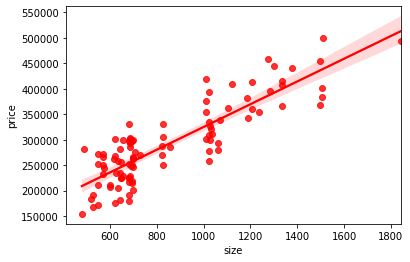

In [25]:
sns.regplot(df['size'],y, color = 'red')

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(model.score(x,y))

0.7447391865847586


In [30]:
prices = model.predict([[2000]])
print(prices)

[548270.08699044]


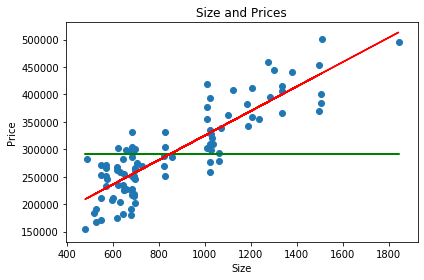

In [33]:
# mean line 
mean = df['price'].mean()
mean_y = np.ones(len(df['price'])) * mean
plt.plot(df['size'], mean_y, color='green')
# regression line
predictions = model.predict(x)
plt.plot(df['size'], predictions, color='red')

# points for existing data
plt.scatter(df['size'], df['price'])
plt.title("Size and Prices")
plt.xlabel('Size')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

292289.47015999997